# Análise de inadimplência baseada em dados de uma instituição financeira - Parte II

### 4 elementos utilizados
- Jupyter notebook
- Streamlit com as análises
- Github
- Vídeo no readme mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o problema e quais os objetivos.

Essa é uma base de proponentes de cartão de crédito (kaggle), nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos
Objetivo é ter informações de diversas variáveis para obter um melhor entendimento sobre a inadimplência dos clientes.

- Objetivos da modelagem
Desenvolver o melhor modelo preditivo de modo a auxiliar na tomada de decisão sobre o crédito.

Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 14 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.


### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente e uma coluna para cada variável armazenando as características desses clientes:


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência	texto                           | texto        |
| id_cliente              |  Código cliente                                     | inteiro      |
| sexo                    |  sexo                                               | M/F          |
| posse_de_veiculo        |  Possui veículo                                     | Y/N          |
| posse_de_imovel         |  POssui imóvel                                      | Y/N          |
| qtd_filhos              |  Quantidade de filhos                               | inteiro      |
| tipo_renda              |  Tipo de renda                                      | texto        |
| educacao                |  Escolariadade                                      | texto        |
| estado_civil            |  Estado civil                                       | texto        |
| tipo_residencia         |  Tipo de residência                                 | texto        |
| idade                   |  Idade (anos)                                       | inteiro      |
| tempo_emprego           |  Tempo de emprego                                   | float        |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                | float        |
| renda                   |  Renda                                              | float        |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [318]:
import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(context='talk', style="darkgrid")
sns.color_palette("hls", 8)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import statsmodels.api as sm

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [319]:
df = pd.read_csv('./input/previsao_de_renda.csv')
df.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [320]:
print ("Número de linhas: {} e colunas: {} da tabela".format(df.shape[0], df.shape[1]))

Número de linhas: 15000 e colunas: 15 da tabela


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Utilizaremos a ferramenta pandas proffiling.

In [322]:
perfil = ProfileReport(df, explorative=True, minimal=True)
perfil

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [323]:
perfil.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




- Funções para análise gráfica

In [324]:
def barras(coluna):
    
    plt.figure(figsize=(12,8))
    ax = sns.countplot(
    data=df,
    x='data_ref',
    hue=coluna
    )
    ax.set_xticks(list(range(df['data_ref'].nunique())))
    ax.set_xticklabels(df['data_ref'].unique(), rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    
def point(coluna): 
    
    plt.figure(figsize=(12,8))
    ax = sns.pointplot(
        data=df,
        x='data_ref',
        y='renda',
        hue=coluna,
        dodge=True,
        ci=95
    )
    ax.set_xticks(list(range(df['data_ref'].nunique())))
    ax.set_xticklabels(df['data_ref'].unique(), rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
def dist(coluna, bins):
    
    plt.figure(figsize=(12,8))
    ax = sns.distplot(
        a=df[coluna],
        bins = bins
    )

- Sexo

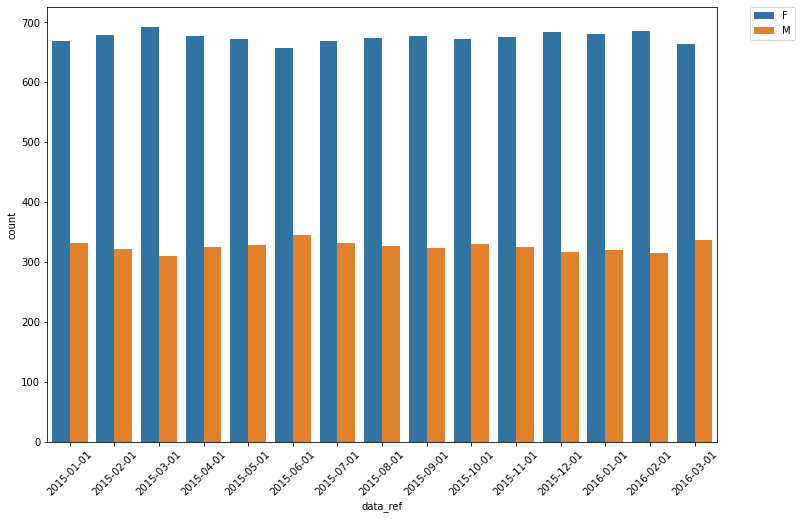

In [325]:
barras('sexo')

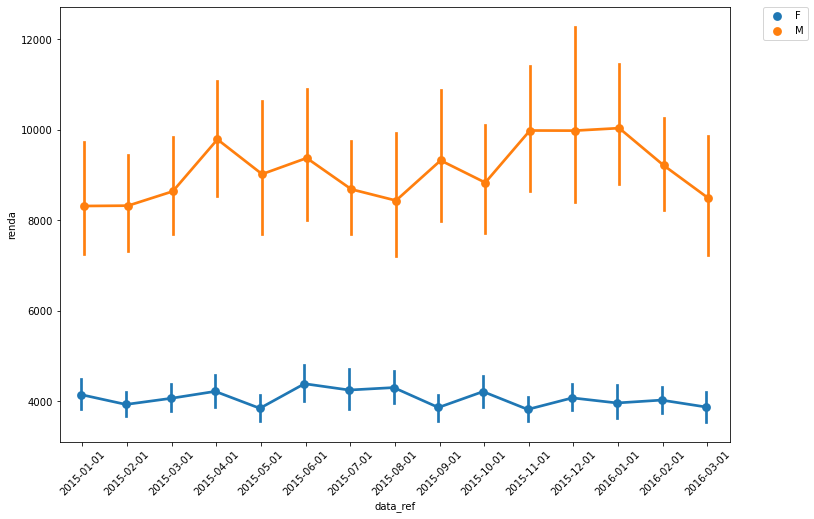

In [326]:
point('sexo')

- Posse de veículo

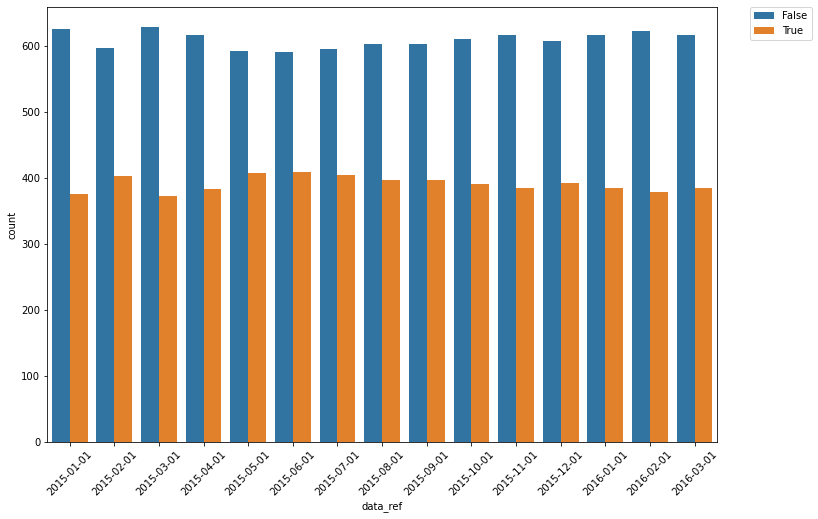

In [327]:
barras('posse_de_veiculo')

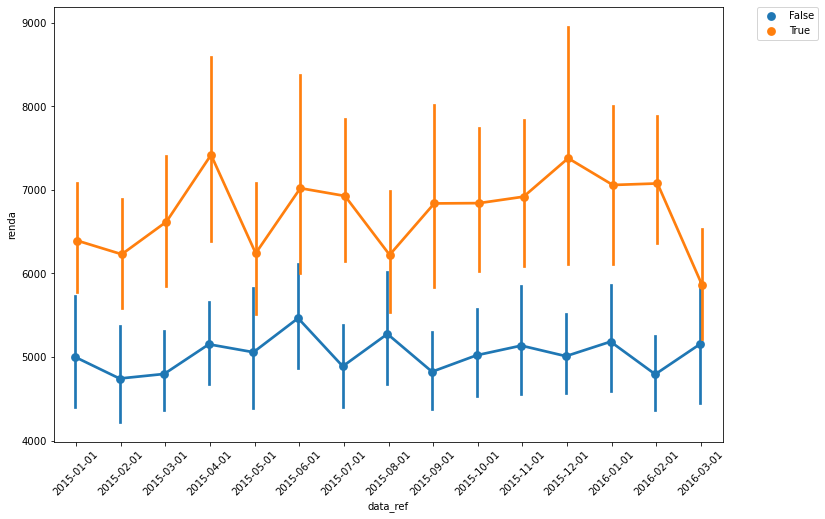

In [328]:
point('posse_de_veiculo')

- Posse de imóvel

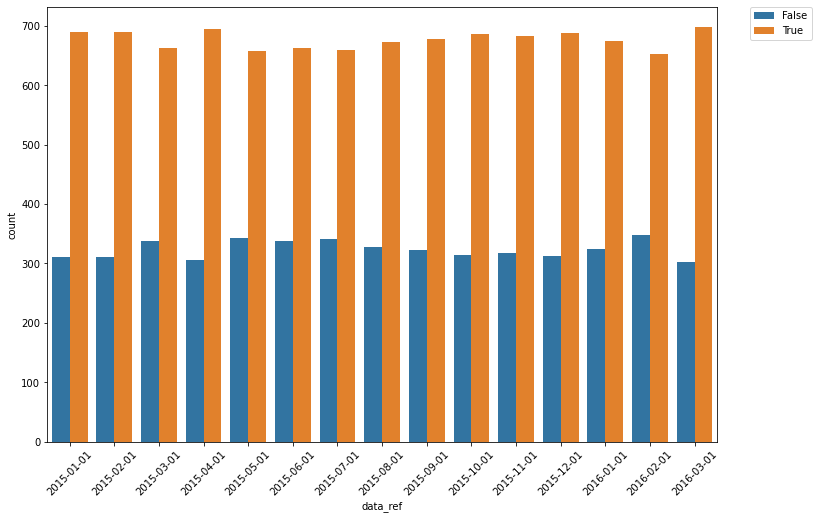

In [329]:
barras('posse_de_imovel')

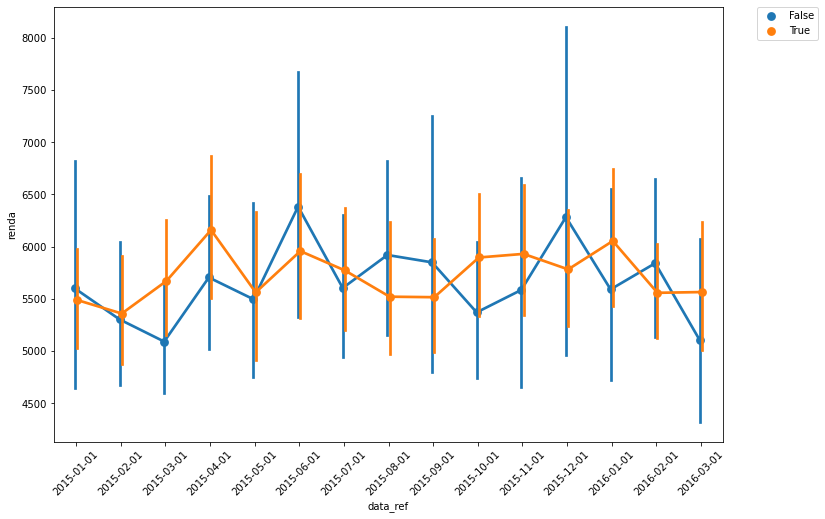

In [330]:
point('posse_de_imovel')

- Quantidade de filhos

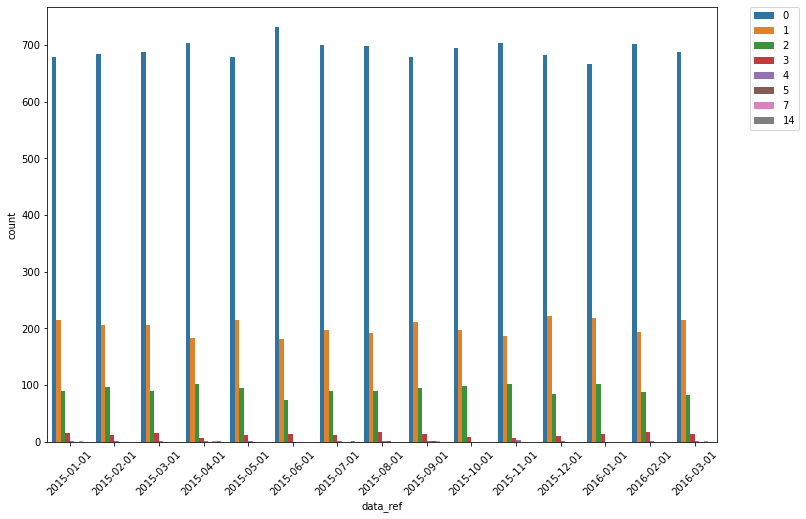

In [331]:
barras('qtd_filhos')

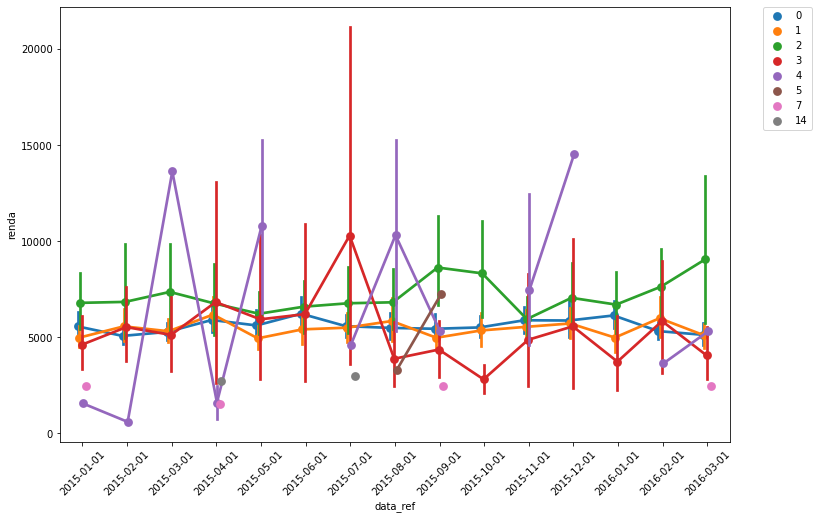

In [332]:
point('qtd_filhos')

C:\Users\Artur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


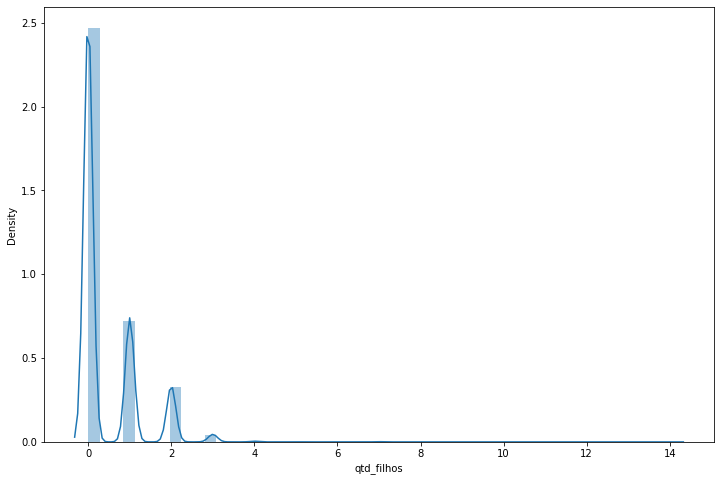

In [333]:
dist('qtd_filhos', 50)

- Tipo de renda

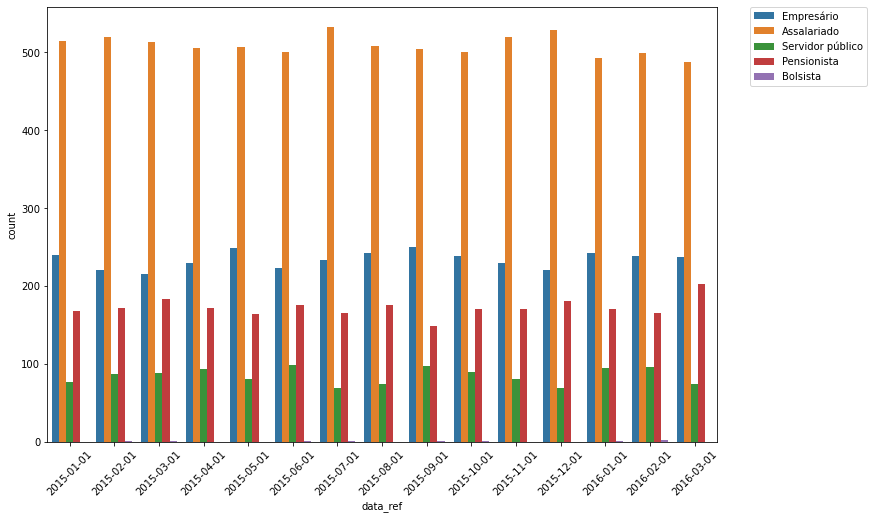

In [334]:
barras('tipo_renda')

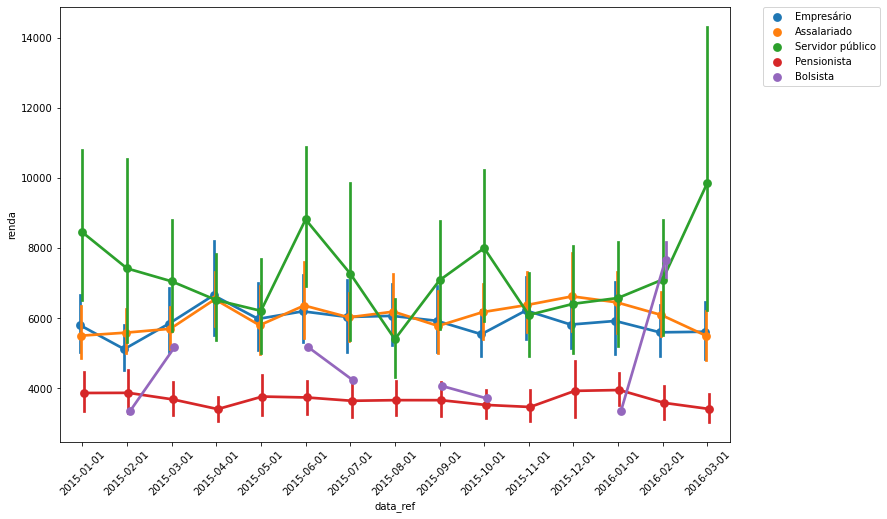

In [335]:
point('tipo_renda')

- Educacao

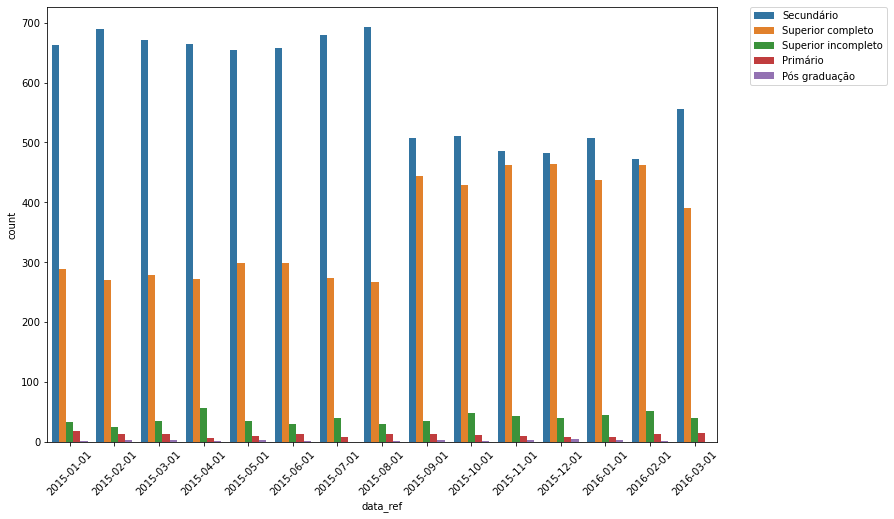

In [336]:
barras('educacao')

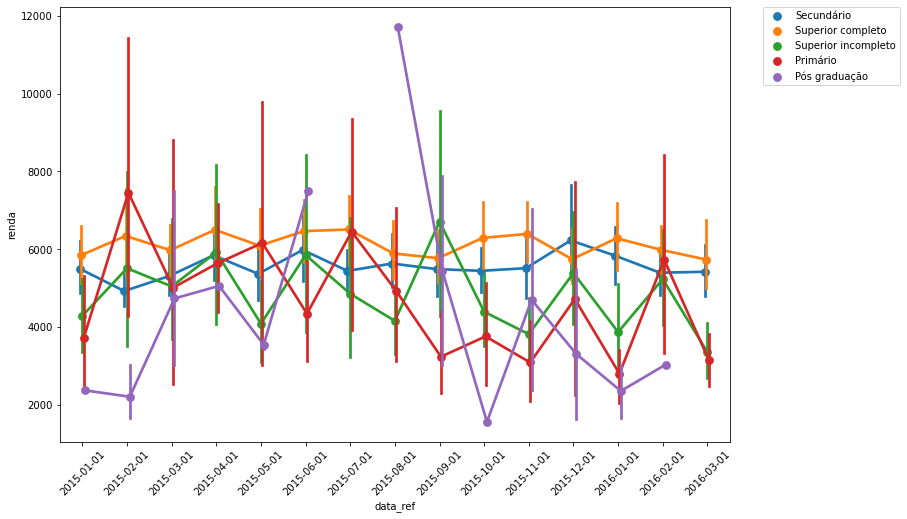

In [337]:
point('educacao')

- Estado civil

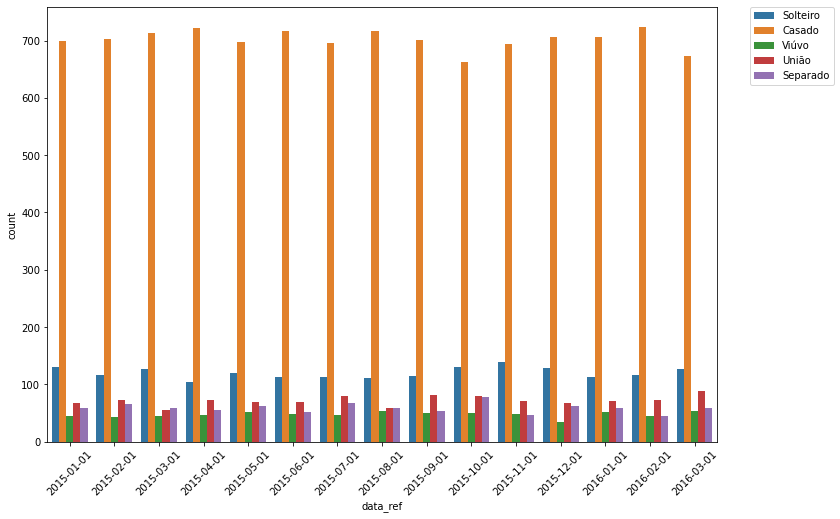

In [338]:
barras('estado_civil')

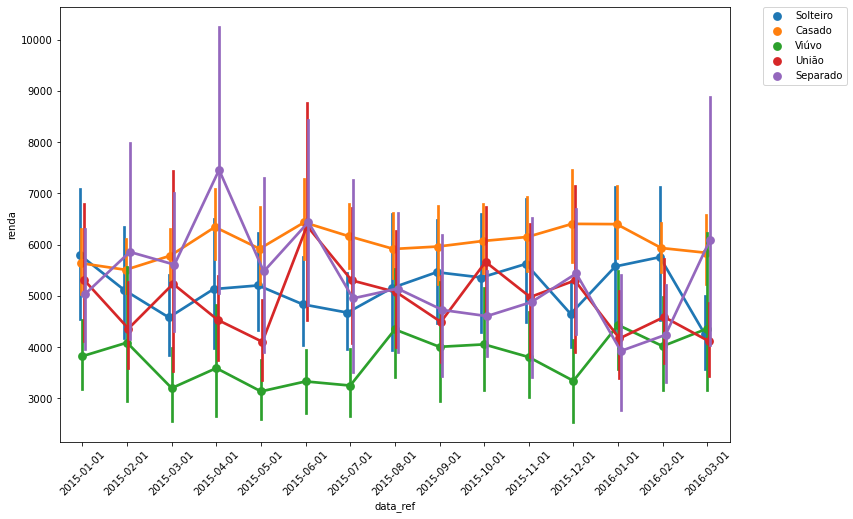

In [339]:
point('estado_civil')

- Tipo de residência

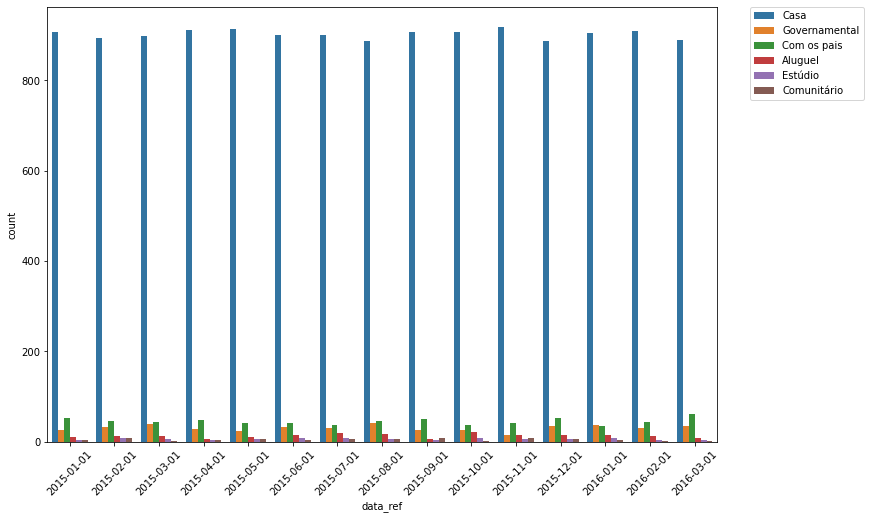

In [340]:
barras('tipo_residencia')

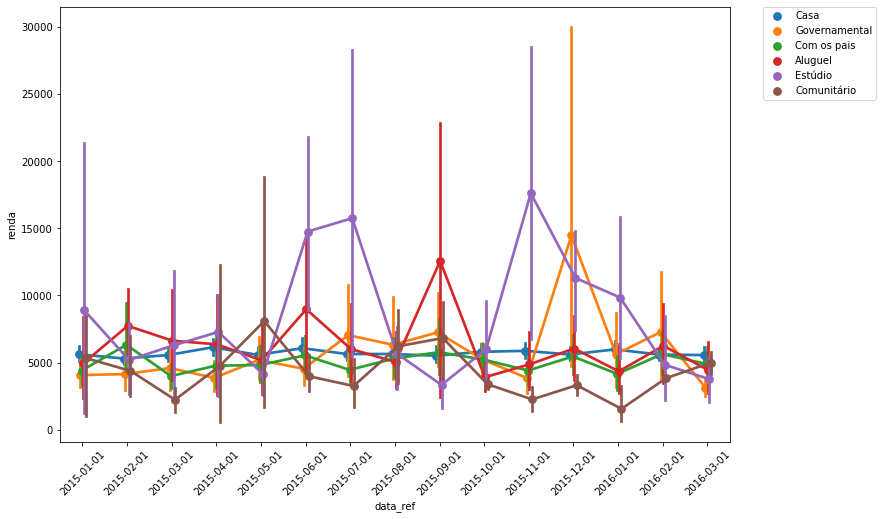

In [341]:
point('tipo_residencia')

- Idade

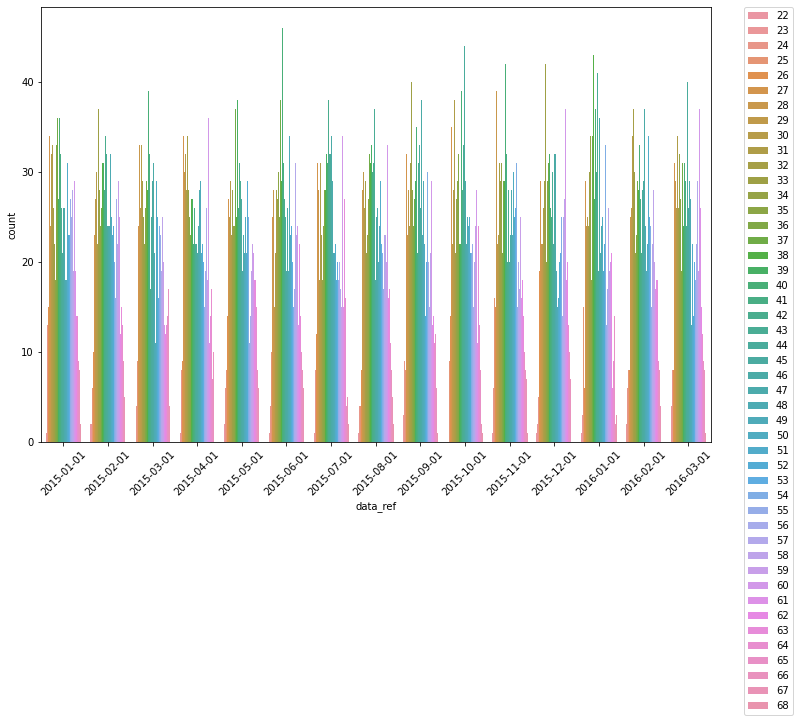

In [342]:
barras('idade')

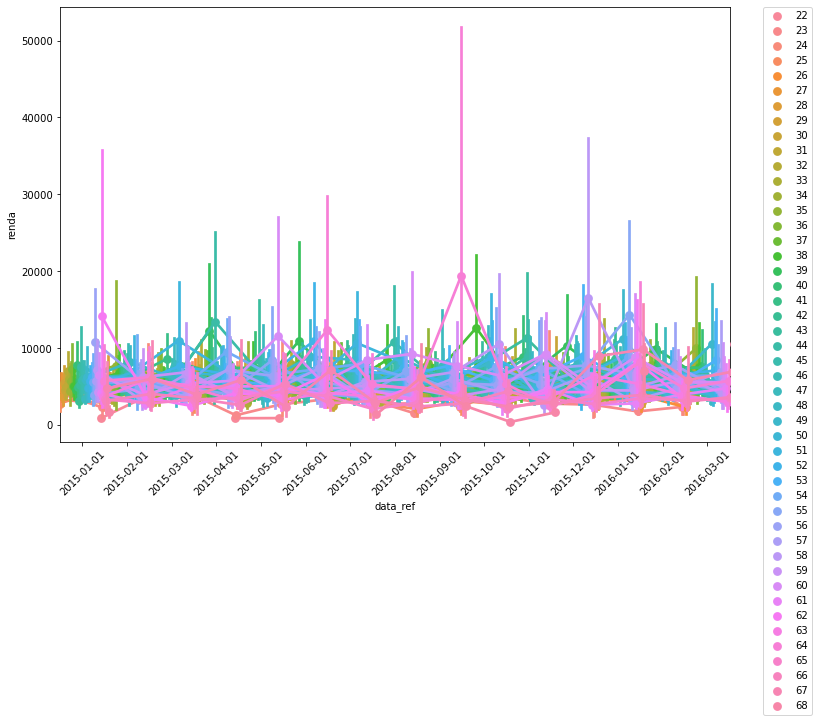

In [343]:
point('idade')

C:\Users\Artur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


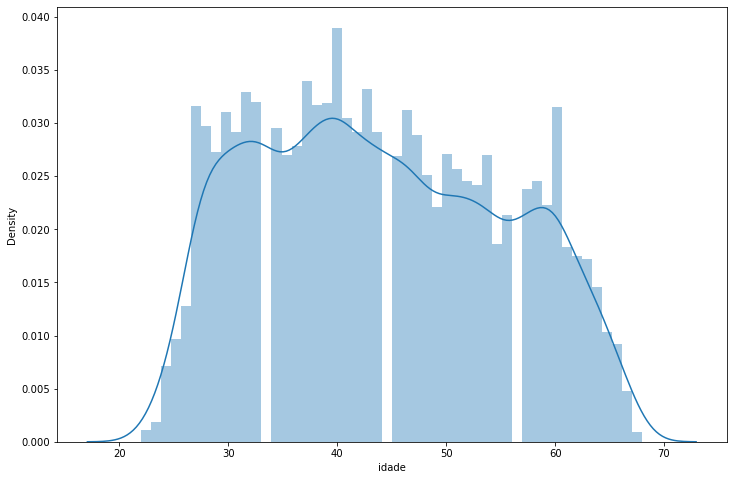

In [344]:
dist('idade', 50)

- Quantidade de pessoas na residência

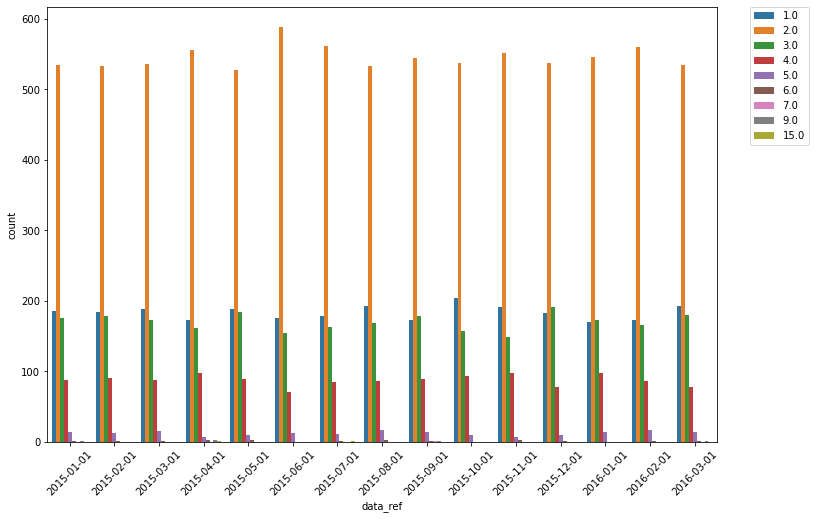

In [345]:
barras('qt_pessoas_residencia')

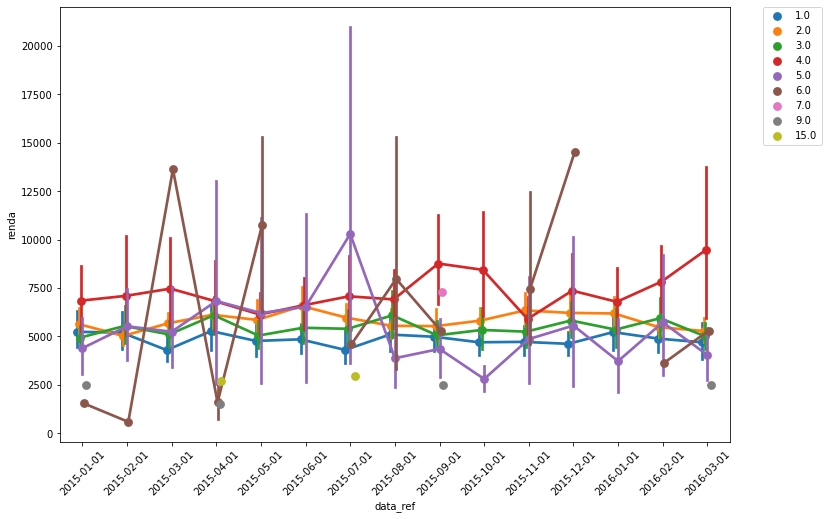

In [346]:
point('qt_pessoas_residencia')

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?




In [347]:
# Eliminação de colunas que não serão utilizados no modelo e registros com dados faltantes. 
df['data_ref'] = pd.to_datetime(df['data_ref']) # para datetime
df.drop(columns=['Unnamed: 0','data_ref','id_cliente'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


In [348]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sexo,15000,2,F,10119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posse_de_veiculo,15000,2,False,9140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posse_de_imovel,15000,2,True,10143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qtd_filhos,15000.0,NaN,NaN,NaN,0.432333,0.746631,0.0,0.0,0.0,1.0,14.0
tipo_renda,15000,5,Assalariado,7633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educacao,15000,5,Secundário,8895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estado_civil,15000,5,Casado,10534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_residencia,15000,6,Casa,13532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idade,15000.0,NaN,NaN,NaN,43.882333,11.273155,22.0,34.0,43.0,53.0,68.0
tempo_emprego,12427.0,NaN,NaN,NaN,7.722635,6.711189,0.117808,2.973973,6.013699,10.120548,42.906849


 - **limpeza**: Precisaremos identificar e tratar dados faltantes


In [349]:
df.isnull().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

Usaremos a média para completar so dados faltantes no tempo de emprego por hora.

In [350]:
df.tempo_emprego.fillna(df.tempo_emprego.mean(), inplace = True)
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [351]:
df.shape

(15000, 12)

In [352]:
df.drop_duplicates().shape

(10447, 12)

Eliminando dados duplicados

In [353]:
df.drop_duplicates(inplace = True)
df.shape

(10447, 12)

 - **construção**: construção de novas variáveis
 

Nesse primeiro momento não criaremos nenhuma variável

- **integração**: Temos apenas uma fonte de dados, não é necessário integração


Temos apenas uma base de dados, nao será necessário nenhuma integração

 - **formatação**: Os dados já se encontram em formatos úteis?

Vamos aplicar a técnica de dummies para tratar os dados tipo str

In [354]:
df_dummies = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel','tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])
df_dummies

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,posse_de_veiculo_False,posse_de_veiculo_True,posse_de_imovel_False,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,26,6.602740,1.0,8060.34,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,28,7.183562,2.0,1852.15,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,35,0.838356,2.0,2253.89,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,30,4.846575,3.0,6600.77,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,33,4.293151,1.0,6475.97,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,1,33,1.041096,3.0,1918.14,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
14996,0,57,7.722635,1.0,10093.45,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
14997,0,45,7.832877,2.0,604.82,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
14998,0,36,4.298630,2.0,3352.27,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


- Correlação

<AxesSubplot:>

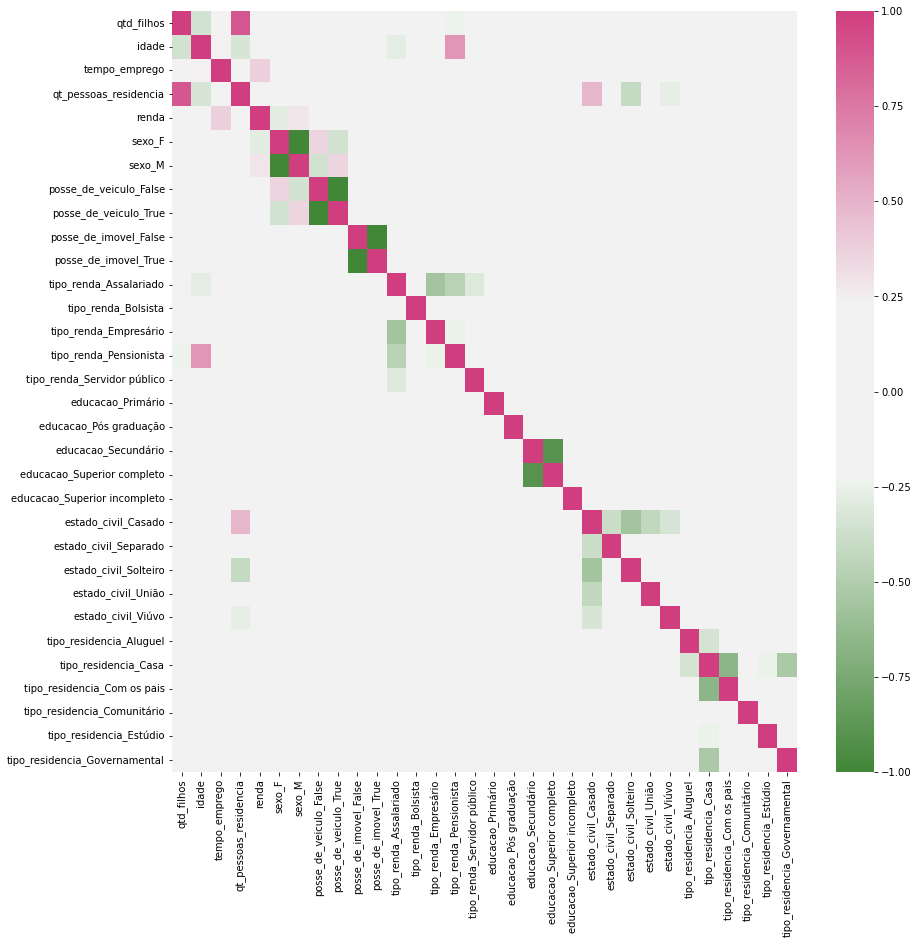

In [355]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
plt.figure(figsize=(14, 14))
sns.heatmap(df_dummies.corr(), cmap=cmap)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Usaremos os modelos de regressão linear e árvore de decisão

- Separando dados de treino e test

In [356]:
X = df_dummies.drop(['renda'], axis=1).copy()
y = df_dummies['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

### Rodando os modelos


- Regressão

In [357]:
md = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(md.summary())    

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     113.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:11:58   Log-Likelihood:                -79852.
No. Observations:                7835   AIC:                         1.598e+05
Df Residuals:                    7810   BIC:                         1.599e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [358]:
md2 = sm.OLS(y_test, sm.add_constant(X_test))
ri2 = md2.fit_regularized(method = 'elastic_net' ,
                             refit = True,
                             L1_wt = 0.1,
                             alpha = 0.01)
print(ri2.summary())   

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     31.62
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          9.48e-160
Time:                        15:11:59   Log-Likelihood:                -27509.
No. Observations:                2612   AIC:                         5.508e+04
Df Residuals:                    2580   BIC:                         5.528e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

C:\Users\Artur\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


- Testando com log da renda

In [359]:
md3 = sm.OLS(np.log(y_test), sm.add_constant(X_test))
ri3 = md3.fit_regularized(method = 'elastic_net' ,
                             refit = True,
                             L1_wt = 0.1,
                             alpha = 0.01)
print(ri3.summary())   

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     102.7
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          7.04e-262
Time:                        15:11:59   Log-Likelihood:                -2789.5
No. Observations:                2612   AIC:                             5613.
Df Residuals:                    2596   BIC:                             5713.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

C:\Users\Artur\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


- Árvore de decisão

In [360]:
dt1 = DecisionTreeRegressor(max_depth=3)
dt2 = DecisionTreeRegressor(max_depth=7)

dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [361]:
mse1 = dt1.score(X_train, y_train)
mse2 = dt2.score(X_train, y_train)

template = "O R-quadrado de treino da árvore com profundidade {0} é: {1:.2f}"

print(template.format(reg1.get_depth(), mse1).replace(".", ","))
print(template.format(reg2.get_depth(), mse2).replace(".", ","))

O R-quadrado de treino da árvore com profundidade 3 é: 0,38
O R-quadrado de treino da árvore com profundidade 8 é: 0,56


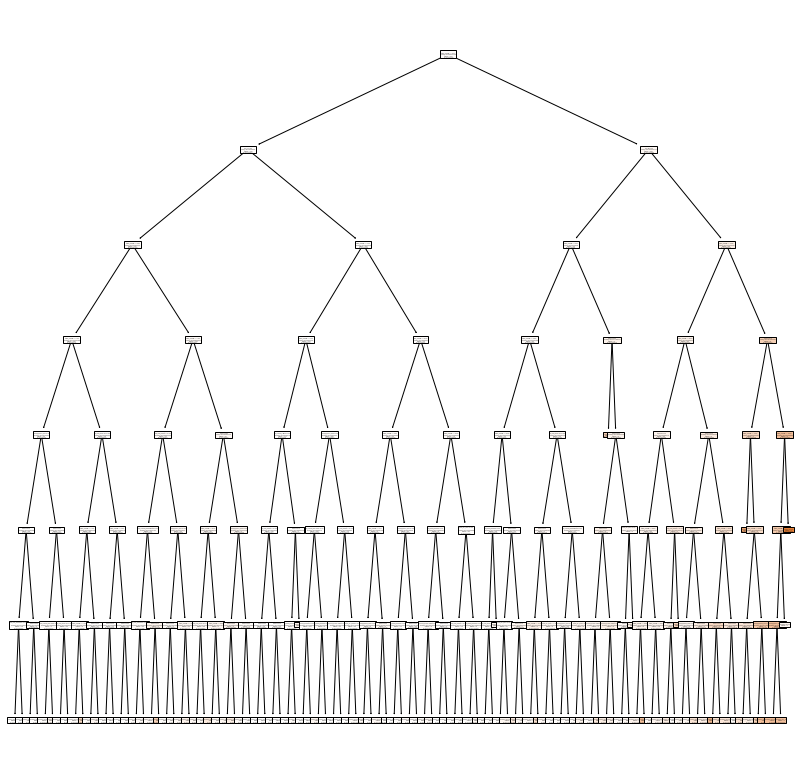

In [362]:
plt.rc('figure', figsize=(14, 14))
tp = tree.plot_tree(dt2,
                    feature_names=X_test.columns,
                    filled=True)

In [363]:
# Pré poda da melhor árvore

dt2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
ad = dt2.fit(X_train, y_train)

In [364]:
y_pred = ad.predict(X_test)
y_pred

array([ 5134.45647619, 10438.87      ,  4059.35248485, ...,
        3123.44659836,  4059.35248485, 17421.75227273])

Text(0, 0.5, 'Impureza total das folhas')

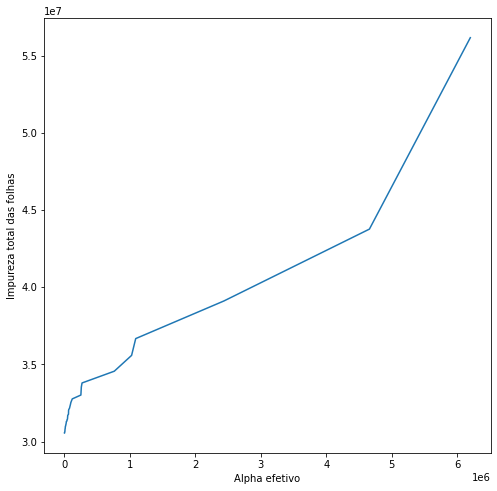

In [365]:
reg3 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
path = reg3.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(8, 8))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [366]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_test, y_test)
    clfs.append(clf)

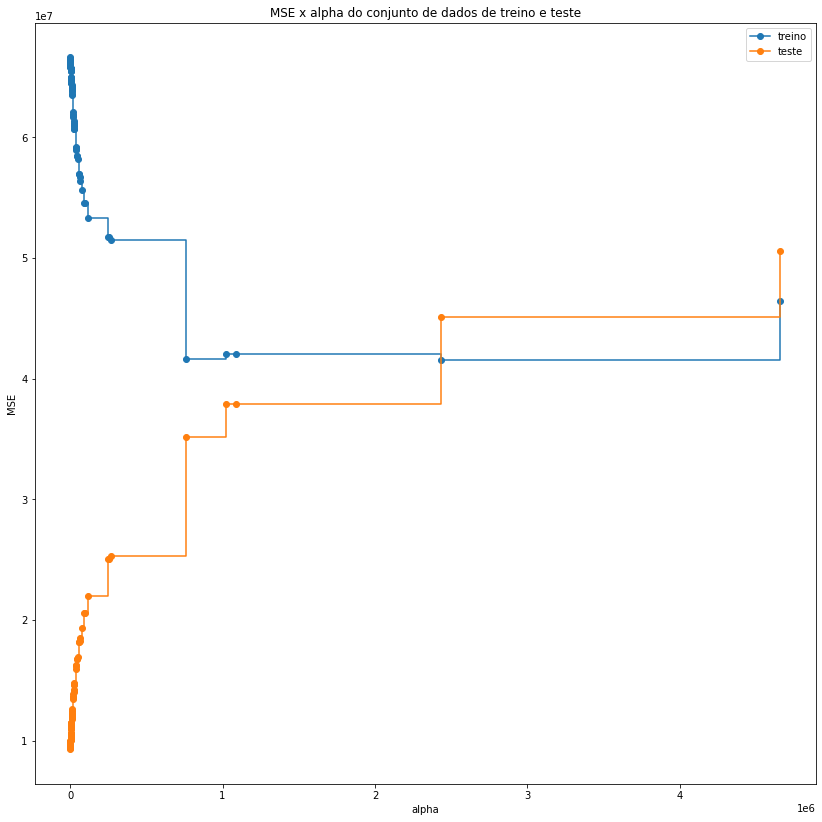

In [367]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Etapa 5 Crisp-DM: Avaliação dos resultados


- Regressão Linear


In [368]:
print(ri2.summary())   

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     31.62
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          9.48e-160
Time:                        15:12:21   Log-Likelihood:                -27509.
No. Observations:                2612   AIC:                         5.508e+04
Df Residuals:                    2580   BIC:                         5.528e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [369]:
print(ri3.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     102.7
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          7.04e-262
Time:                        15:12:21   Log-Likelihood:                -2789.5
No. Observations:                2612   AIC:                             5613.
Df Residuals:                    2596   BIC:                             5713.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- Árvore de decisão

In [370]:
print(f"R² de treino é: {reg2.score(X_train, y_train)*100:.2f}%")
print(f"R² de teste é: {reg2.score(X_test, y_test)*100:.2f}%")
print(f"R² de previsão é: {r2_score(y_test, y_pred)*100:.2f}%")

R² de treino é: 45.60%
R² de teste é: 42.71%
R² de previsão é: 42.62%


Para as regressões lineares, o melhor resultado obtido foi com log em renda. Já com a árvore de decisão, o melhor resultado foi com profundidade de 8, sendo esse o melhor modelo até agora.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [371]:
#Dados os parâmetros de entrada, retorna a renda prevista.  


coef = {'Intercept':[ri3.params[0]],
        'idade':[ri3.params[2]],
        'tempo_emprego':[ri3.params[3]],
        'sexo_F':[ri3.params[5]],
        'posse_de_imovel_True':[ri3.params[4]],
        'tipo_renda_Assalariado':[ri3.params[5]],
        'tipo_residencia_Estúdio' : [ri3.params[31]],
        'estado_civil_Viúvo': [ri3.params[25]],
        'estado_civil_Casado': [ri3.params[21]],
        'educacao_Secundário': [ri3.params[17]],
        'educacao_Superior_completo': [ri3.params[18]],
        'tipo_renda_Empresário': [ri3.params[13]],
        'tipo_renda_Pensionista': [ri3.params[14]],
        'tipo_renda_Servidor_público': [ri3.params[15]],
        'posse_de_veiculo_True': [ri3.params[8]], 
        'qtd_filhos': [ri3.params[1]],
        'qt_pessoas_residencia': [ri3.params[4]]}

df_coef = pd.DataFrame(data=coef)

idade = 33
tempo_emprego = 2
sexo_F = 1
posse_de_imovel_True = 1
tipo_renda_Assalariado = 0
educacao_Superior_completo = 1
tipo_residencia_Estúdio= 1
estado_civil_Viúvo = 0
estado_civil_Casado = 1
educacao_Secundário = 0
tipo_renda_Empresário = 1
tipo_renda_Pensionista = 0
tipo_renda_Servidor_público = 0
posse_de_veiculo_True = 1
qtd_filhos = 0
qt_pessoas_residencia = 2

#Equação para determinação da renda baseado na idade, tempo de emprego, sexo, posse de imóvel, tipo renda e educação
resultado_renda = (df_coef['Intercept'] + (df_coef['idade'] * idade) + 
                  (df_coef['tempo_emprego'] * tempo_emprego) + (df_coef['sexo_F'] * sexo_F) + 
                  (df_coef['posse_de_imovel_True'] * posse_de_imovel_True) + 
                  (df_coef['tipo_renda_Assalariado'] * tipo_renda_Assalariado) + 
                  (df_coef['educacao_Superior_completo'] * educacao_Superior_completo) +
                  (df_coef['tipo_residencia_Estúdio'] * tipo_residencia_Estúdio) + 
                  (df_coef['estado_civil_Viúvo'] * estado_civil_Viúvo) + 
                  (df_coef['estado_civil_Casado'] * estado_civil_Casado) +
                  (df_coef['educacao_Secundário'] * educacao_Secundário) +
                  (df_coef['tipo_renda_Empresário'] * tipo_renda_Empresário) +
                  (df_coef['tipo_renda_Pensionista'] * tipo_renda_Pensionista) +
                  (df_coef['tipo_renda_Servidor_público'] * tipo_renda_Servidor_público) +
                  (df_coef['posse_de_veiculo_True'] * posse_de_veiculo_True) +
                  (df_coef['qtd_filhos'] * qtd_filhos) +
                  (df_coef['qt_pessoas_residencia'] * qt_pessoas_residencia))

resultado = np.exp(resultado_renda)
round(resultado[0],2)

1902.62